In [40]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

In [41]:
# contants
RANDOM_SEED=2021
LABELS=["Normal","Fraud"]

In [42]:
# 2 load dataset 
dataset=pd.read_csv("creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [43]:
# 3 standard scaler
sc=StandardScaler()
dataset['Time']=sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [44]:
# 4 norma transaction
normal_transaction=dataset[dataset.Class==0]
num_to_convert=int(len(normal_transaction)*0.05)
normal_to_fraud=normal_transaction.sample(n=num_to_convert,random_state=2021)
dataset.loc[normal_to_fraud.index,'Class']=1

In [45]:
#5 dataset split
raw_data=dataset.values
labels=raw_data[:,-1]
data=raw_data[:,0:-1]
traindata,testdata,trainlabel,testlabel=train_test_split(data,labels,test_size=0.2,random_state=2021)
traindata=tf.cast(traindata,tf.float32)
testdata=tf.cast(testdata,tf.float32)

In [46]:
# 6 normalize
min_val=tf.reduce_min(traindata)
max_val=tf.reduce_max(traindata)
traindata=(traindata-min_val)/(max_val-min_val)
testdata=(testdata-min_val)/(max_val-min_val)

In [47]:
#7 separate normalize and fraud data
trainlabel=trainlabel.astype(bool)
testlabel=testlabel.astype(bool)
normalize_traindata=traindata[~trainlabel]
normalize_testdata=testdata[~testlabel]

In [48]:
# 8 autoencoder model
input_dim=normalize_traindata.shape[1]
encod_dim=14
hidden1_dim=int(encod_dim/2)
hidden2_dim=4
learning_rate=1e-7

In [49]:
# 9 encoder decoder
input_layer=tf.keras.layers.Input(shape=(input_dim,))

encoder=tf.keras.layers.Dense(encod_dim,activation="tanh",
                             activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder=tf.keras.layers.Dense(hidden1_dim,activation="relu")(encoder)
encoder=tf.keras.layers.Dense(hidden1_dim,activation=tf.nn.leaky_relu)(encoder)

decoder=tf.keras.layers.Dense(hidden1_dim,activation="relu")(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder=tf.keras.layers.Dense(encod_dim,activation="relu")(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation="tanh")(decoder)

autoencoder=tf.keras.Model(inputs=input_layer,outputs=decoder)
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [50]:
#10 train model fit model
history=autoencoder.fit(
    normalize_traindata,normalize_traindata,
    epochs=10,
    batch_size=64,
    validation_data=(testdata,testdata),
    shuffle=True,
    verbose=1
).history

Epoch 1/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.0398 - loss: 0.0235 - val_accuracy: 0.0596 - val_loss: 2.1181e-05
Epoch 2/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0667 - loss: 1.9337e-05 - val_accuracy: 0.0363 - val_loss: 2.0709e-05
Epoch 3/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0618 - loss: 1.9398e-05 - val_accuracy: 0.0585 - val_loss: 2.3863e-05
Epoch 4/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0613 - loss: 1.9922e-05 - val_accuracy: 0.1279 - val_loss: 2.0868e-05
Epoch 5/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0699 - loss: 1.9670e-05 - val_accuracy: 0.0037 - val_loss: 2.1622e-05
Epoch 6/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0644 - loss: 1.9887e-05 - val_accuracy: 0.0661 - val_loss: 2.3647e-05
Epoch 7/10
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0598 - loss: 1.9738e-05 - val_accuracy: 0.0269 - val_loss: 2.1529e-05
Epoch 8/10
3378/3378 ━━━━━━━━━━

In [51]:
# 11 anomoly detection
test_x_pred=autoencoder.predict(testdata)
mse=np.mean(np.power(testdata-test_x_pred,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse,'True_class':testlabel})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [52]:
# 12 thresgold
threshold_fixed=0.00014653
pred_y=[1 if e>threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred']=pred_y

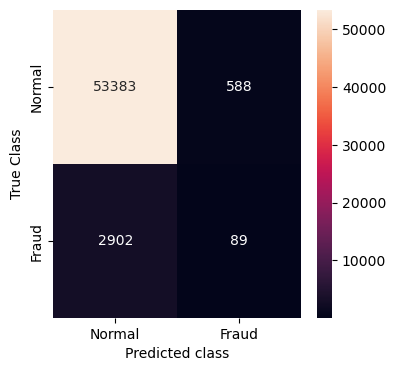

In [53]:
# 13 confusion_matrix
import seaborn as sns
conf_matrix=confusion_matrix(error_df.True_class,pred_y)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

In [55]:
print("accuracy",accuracy_score(error_df['True_class'],error_df['pred']))
print("precision",precision_score(error_df['True_class'],error_df['pred']))
print("recall",recall_score(error_df['True_class'],error_df['pred']))

accuracy 0.9387310838804818
precision 0.13146233382570163
recall 0.0297559344700769
